In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Sales_Outlier.csv

In [42]:
sales=pd.read_csv("C:/Users/admin/IBM_Training/Training/03 -[Data Preprocessing] Numpy - Series, DataFrame, Missing, Group, Merge/Sales_Outliers.csv")

In [3]:
sales.head()
sales.isnull().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [43]:
sales["Item_Weight"].fillna(np.mean(sales["Item_Weight"]),inplace=True)
sales=sales.iloc[:,1:]
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
sales.head(5)

#detect_outlier(sales["Item_Weight"])
#np.abs(-25)

#print(np.mean(sales["Item_Weight"]))
#np.std(sales["Item_Weight"])
np.abs(-55.5555)
print(np.mean(sales["Item_Outlet_Sales"]))
np.median(sales["Item_Outlet_Sales"])

2181.2889135750365


1794.331

In [11]:
#detecting outliers Function

def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [24]:
min(detect_outliers(sales["Item_Outlet_Sales"]))

#sales[sales["Item_Outlet_Sales"]>=7317.142] # that replace all the observation that are greater than 7317 with the mean of Sales colum

7317.142

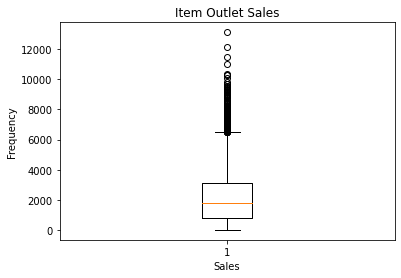

In [22]:
#np.min(detect_outliers(sales["Item_Outlet_Sales"]))

plt.boxplot(sales["Item_Outlet_Sales"])
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Item Outlet Sales");

#If we replace the outliers with mean ...and then after that again check the outliers , will there be any outliers present ??

In [48]:
#Replacing the Outliers with Median/Mean values

sales["Item_Outlet_Sales"]=np.where(sales["Item_Outlet_Sales"]>=7317.142,sales["Item_Outlet_Sales"].median(),sales["Item_Outlet_Sales"])

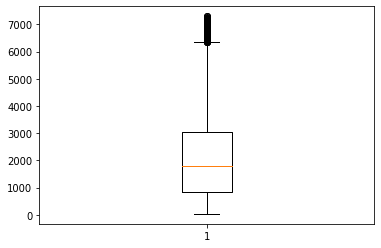

In [53]:
plt.boxplot(sales["Item_Outlet_Sales"]);

In [ ]:
#Calculating z_score of each datapoint

def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        outlier.append(z_score)
    return outlier

In [ ]:
#Checking the Outliers
x=detect_outliers(sales["Item_Outlet_Sales"])
x

In [25]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Marking the Outliers
np.min(detect_outliers(sales["Item_Outlet_Sales"]))

In [ ]:
#plotting of x(Outliers)
plt.boxplot(sales["Item_Outlet_Sales"])
plt.show()

In [ ]:
#Checking the Outliers from the dataset
sales[sales["Item_Outlet_Sales"]>7317]

# Standardization

Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian

Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc)

These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.


## Algorithms that requires Standardized Data

1. Before PCA(Principal Component Analysis)
2. Before K-Means Clustering
3. Before KNN
4. Before SVM
5. Before Ridge and Lasso Regression


In [ ]:
sales.head()

In [27]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()

sales["Item_Weight"]=scaling.fit_transform(sales[["Item_Weight"]])
sales["Item_Visibility"]=scaling.fit_transform(sales[["Item_Visibility"]])
sales["Item_MRP"]=scaling.fit_transform(sales[["Item_MRP"]])
sales["Outlet_Establishment_Year"]=scaling.fit_transform(sales[["Outlet_Establishment_Year"]])
sales["Item_Outlet_Sales"]=scaling.fit_transform(sales[["Item_Outlet_Sales"]])



In [39]:
sales.head()
max(sales["Item_Outlet_Sales"])

6.391044932769205

# Normalization

Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0. Basically the requirement of Normalization is used where we want to eliminate the units in dataset like height of car in inches vs the weight of the car in Kg or Pound.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
abc=scaling.fit_transform(sales[["Item_Weight"]])

In [ ]:
sales.head()

In [ ]:
sales["Item_Weight"]=scaling.fit_transform(sales[["Item_Weight"]])
sales["Item_Visibility"]=scaling.fit_transform(sales[["Item_Visibility"]])
sales["Item_MRP"]=scaling.fit_transform(sales[["Item_MRP"]])
sales["Outlet_Establishment_Year"]=scaling.fit_transform(sales[["Outlet_Establishment_Year"]])
sales["Item_Outlet_Sales"]=scaling.fit_transform(sales[["Item_Outlet_Sales"]])

In [ ]:
sales.head(20)
#If we replace the outliers with mean ...and then after that again check the outliers , will there be any outliers present ??

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

# Great Job!